In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Читаємо файл



cars= pd.read_csv('~/Desktop/Python/KNUTE data/Cars/car_registr.csv', sep=';', dtype={'OWN_WEIGHT':object, 'TOTAL_WEIGHT':object}, keep_default_na=False)
cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PERSON           159610 non-null  object
 1   REG_ADDR_KOATUU  159610 non-null  int64 
 2   OPER_CODE        159610 non-null  int64 
 3   OPER_NAME        159610 non-null  object
 4   D_REG            159610 non-null  object
 5   DEP_CODE         159610 non-null  int64 
 6   DEP              159610 non-null  object
 7   BRAND            159610 non-null  object
 8   MODEL            159610 non-null  object
 9   VIN              159610 non-null  object
 10  MAKE_YEAR        159610 non-null  int64 
 11  COLOR            159610 non-null  object
 12  KIND             159610 non-null  object
 13  BODY             159610 non-null  object
 14  PURPOSE          159610 non-null  object
 15  FUEL             159610 non-null  object
 16  CAPACITY         159610 non-null  object
 17  OWN_WEIGHT

In [3]:


cars['D_REG'] = pd.to_datetime(cars.D_REG)


In [4]:

#Змінюємо тип на категорію

cars[['PERSON','DEP', 'DEP_CODE','BRAND','MODEL', 'KIND', 'COLOR','PURPOSE','BODY','FUEL']]= cars[['PERSON', 'DEP', 'DEP_CODE','BRAND','MODEL', 'KIND', 'COLOR','PURPOSE','BODY','FUEL']].apply(lambda x: x.astype('category'))


In [5]:
#Let's make our back up
cars_copy = cars

In [8]:
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PERSON           159610 non-null  category      
 1   REG_ADDR_KOATUU  159610 non-null  int64         
 2   OPER_CODE        159610 non-null  int64         
 3   OPER_NAME        159610 non-null  object        
 4   D_REG            159610 non-null  datetime64[ns]
 5   DEP_CODE         159610 non-null  category      
 6   DEP              159610 non-null  category      
 7   BRAND            159610 non-null  category      
 8   MODEL            159610 non-null  category      
 9   VIN              159610 non-null  object        
 10  MAKE_YEAR        159610 non-null  int64         
 11  COLOR            159610 non-null  category      
 12  KIND             159610 non-null  category      
 13  BODY             159610 non-null  category      
 14  PURPOSE          159

In [6]:
#Change type of column to float
cars[['CAPACITY','OWN_WEIGHT', 'TOTAL_WEIGHT']] = cars[['CAPACITY','OWN_WEIGHT','TOTAL_WEIGHT']].apply(pd.to_numeric, errors='coerce')

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159610 entries, 0 to 159609
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PERSON           159610 non-null  category      
 1   REG_ADDR_KOATUU  159610 non-null  int64         
 2   OPER_CODE        159610 non-null  int64         
 3   OPER_NAME        159610 non-null  object        
 4   D_REG            159610 non-null  datetime64[ns]
 5   DEP_CODE         159610 non-null  category      
 6   DEP              159610 non-null  category      
 7   BRAND            159610 non-null  category      
 8   MODEL            159610 non-null  category      
 9   VIN              159610 non-null  object        
 10  MAKE_YEAR        159610 non-null  int64         
 11  COLOR            159610 non-null  category      
 12  KIND             159610 non-null  category      
 13  BODY             159610 non-null  category      
 14  PURPOSE          159

<AxesSubplot:>

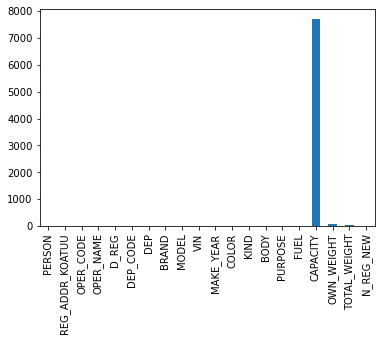

In [9]:
#Searching for an empty values
cars.isna().sum().plot(kind='bar')

<AxesSubplot:>

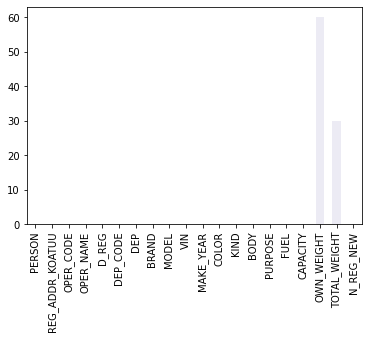

In [16]:
# 8 thousand it's to much, was decided to drop it 
cars.dropna(subset=['CAPACITY'], inplace=True)
cars.isna().sum().plot(kind='bar')

In [17]:
#These we will be use commonly so it thrive into simple function
def count_plots(column, data):
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=90)

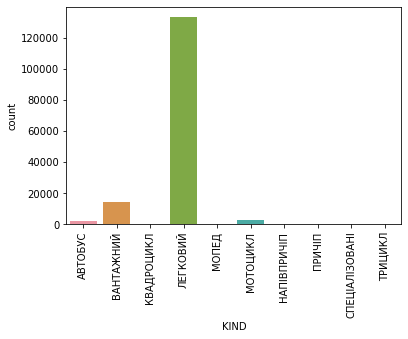

In [18]:
#From this point we could make some brief analysis
#sns.countplot(x='KIND', data=cars)
#plt.xticks(rotation=90)
count_plots('KIND', cars)

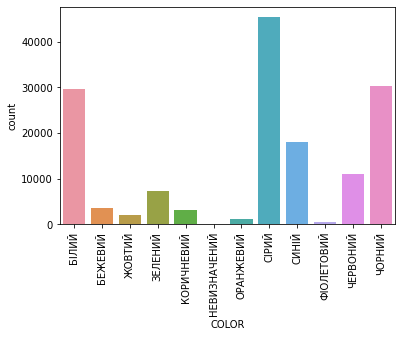

In [22]:
#The popularest colors we have
count_plots('COLOR', cars)

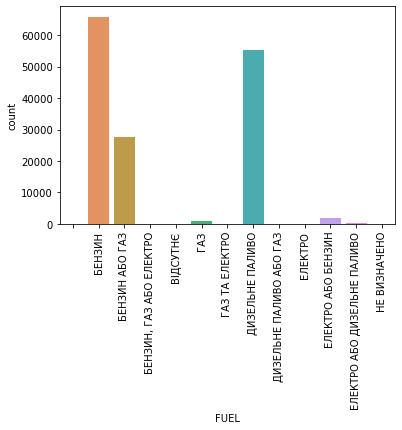

In [23]:
#And a few popular fueltypes
count_plots('FUEL', cars)

In [24]:
#Greate, from this point i want to understand one more thing, which brand  or model appears more frequently 

In [36]:
#And we will use function to count how frequently which brand  or model appears 
def sorted_counted(data, column, num=10, count_keep=True):
    count= data[column].value_counts(sort=True)
    top = count[:num]
    if count_keep == True:
        return top
    else:
        drop=data[column].isin(top.index)
        data = data[drop]
        return data

In [68]:

drop=sorted_counted(cars, 'MODEL', num=15, count_keep=True)
#count_plots('MODEL', drop)
drop

PASSAT           5160
GOLF             3818
OCTAVIA          3546
MEGANE           2790
LANOS            2501
FOCUS            2450
FABIA            1844
ASTRA            1746
ZAFIRA           1422
LOGAN            1365
MEGANE SCENIC    1357
CAMRY            1340
AVEO             1336
A6               1305
JETTA            1246
Name: MODEL, dtype: int64

In [87]:

sns.set_palette('Paired')


<AxesSubplot:>

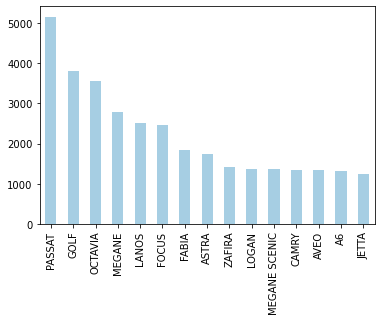

In [88]:
#ax = pd.crosstab(drop.BRAND, drop.COLOR).plot(kind='bar')
#Here we get our top models, let's see most useful color 
drop.plot(kind='bar')

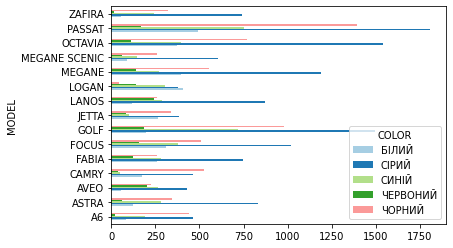

In [89]:
freq_model = sorted_counted(cars, 'MODEL', num=15, count_keep=False)

color = sorted_counted(cars, 'COLOR', num=5, count_keep=True)

sub = freq_model['COLOR'].isin(color.index)
freq_model = freq_model[sub]
#Plotting most popular color with most popular models
ax = pd.crosstab(freq_model.MODEL, freq_model.COLOR).plot(kind='barh')

In [85]:
#But after a comprahanding these data, I realized that it's not the case, we have duplicates and can't drop cause
#those dublicates belongs to diffrent category operation which determins why car has been added to db

In [125]:
#At first it's needed to create dataframe with top operation and than drop duplicates
series_top_oper = sorted_counted(cars, 'OPER_NAME', num=10, count_keep=True)
df_top_oper = sorted_counted(cars, 'OPER_NAME', num=10, count_keep=False)

In [102]:
#All unique operations take a number 77 deffrent types which contains in 151910
count= 0 
for i in cars.OPER_NAME:
    count+=1
print(count)

#Our top 10 contains 135676 rows of original dataset, thas more than 80 percent, greate we could work with it
count_top = 0
for y in df_top_oper.OPER_NAME:
    count_top+=1
print(count_top)

151910
135676


In [ ]:
#For convinience let's change long cirilic names to smth smaller and more apparent for visualizing

In [103]:
mapping = {'ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ УКЛАДЕНОМУ В ТСЦ':'new_own', 'ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПIВЛI-ПРОДАЖУ (СГ)':'sale_buy',
          'РЕЄСТРАЦІЯ ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ПОСВІДЧЕННЮ МИТНИЦІ':'abroad', 'ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ':'cpmpany_abroad',
          'ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ':'new_f_abroad',
          'ПЕРВИННА РЕЄСТРАЦІЯ НОВОГО ТЗ ПРИДБАНОГО В ТОРГІВЕЛЬНІЙ ОРГАНІЗАЦІЇ, ЯКИЙ ВВЕЗЕНО З-ЗА КОРДОНУ':'new_c_f_abroad',
          'НАЛЕЖНИЙ КОРИСТУВАЧ. РЕЄСТРАЦІЯ':'registr', 'РЕЄСТРАЦIЯ Б/В ТЗ ПРИВЕЗЕНОГО З-ЗА КОРДОНУ ПО ВМД':'abr_use_vmd',
          'ПЕРЕРЕЄСТРАЦІЯ ПРИ ЗАМІНІ НОМЕРНОГО ЗНАКУ':'number_chng', 'ЗНЯТТЯ З ОБЛIКУ У ЗВ`ЯЗКУ З ВИБРАКОВКОЮ':'end_registr',
          'ПЕРЕРЕЄСТРАЦIЯ ПРИ ВТРАТІ СВIДОЦТВА ПРО РЕЄСТРАЦIЮ':'renew_reg_af_lose'}



In [129]:
df_top_oper['OPER_NAME'] = df_top_oper.loc[:, 'OPER_NAME'].map(mapping)

/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1591/3639657141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_oper['OPER_NAME'] = df_top_oper.loc[:, 'OPER_NAME'].map(mapping)


In [137]:
#Actually we gained uor aim and dropped duplicates< it has been over 4thousands of rows
df_top_oper.drop_duplicates(subset='VIN', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [147]:
#FROM now atger droping duplicates, every car is unique in our dataset let's check it out
count=0
for i in df_top_oper.VIN.unique():
    count+=1
print('Unique cars count:')
print(count)
df_top_oper.info()

Unique cars count:
131518
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131518 entries, 0 to 159609
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PERSON           131518 non-null  category      
 1   REG_ADDR_KOATUU  131518 non-null  int64         
 2   OPER_CODE        131518 non-null  int64         
 3   OPER_NAME        131518 non-null  object        
 4   D_REG            131518 non-null  datetime64[ns]
 5   DEP_CODE         131518 non-null  category      
 6   DEP              131518 non-null  category      
 7   BRAND            131518 non-null  category      
 8   MODEL            131518 non-null  category      
 9   VIN              131518 non-null  object        
 10  MAKE_YEAR        131518 non-null  int64         
 11  COLOR            131518 non-null  category      
 12  KIND             131518 non-null  category      
 13  BODY             131518 non-null  category      

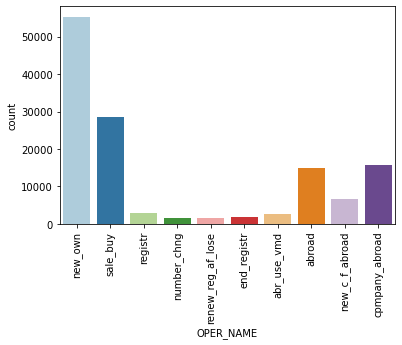

In [155]:
#For now i just wanna to understand which operation appears more frequently
count_plots('OPER_NAME', df_top_oper)

In [181]:
#Previous plot show to us that new_owners are main clients 
#Let's see which cars are in the top of new_owners registration
top_new_owners = df_top_oper[df_top_oper['OPER_NAME']=='new_own']
top_new_owners = sorted_counted(top_new_owners, 'MODEL', count_keep=False)
top_new_owners = sorted_counted(top_new_owners, 'COLOR', num=5, count_keep=False)


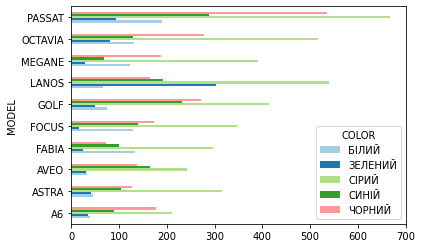

In [170]:
#By this point we reached that new_owners the most prefer Volkswagen Passat 
#Let's make another plot ad visualize top car by fuel
ax = pd.crosstab(top_new_owners.MODEL, top_new_owners.COLOR).plot(kind='barh')

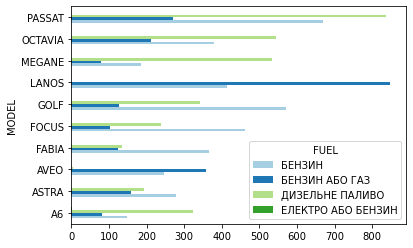

In [175]:
#Also i wanna now which fuel type is on the top
ax1 = pd.crosstab(top_new_owners.MODEL, top_new_owners.FUEL).plot(kind='barh')

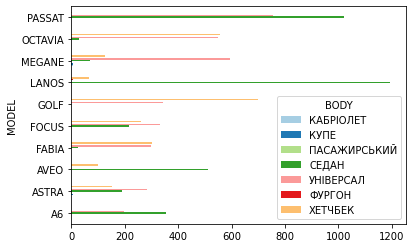

In [176]:
#And body of car
ax2 = pd.crosstab(top_new_owners.MODEL, top_new_owners.BODY).plot(kind='barh')

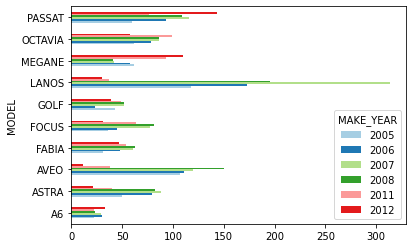

In [187]:
#At last i wann take a look about make year
df_make_year_new_own = sorted_counted(top_new_owners, 'MAKE_YEAR', num=6, count_keep=False)
ax4 = pd.crosstab(df_make_year_new_own.MODEL, df_make_year_new_own.MAKE_YEAR).plot(kind='barh')

In [ ]:
#From this point we see that Passat 2008, 2012 year with diesel engine in gray color is the most popular car 
#And of course same anylysis could be done for another Operational sub groups but Im exhausted about this data
#But this data set not useful for any correlations or even more predictions, God sake
#So i make some simple analysis just for my own pleasure
#If someone had digged here, hope u are fine :) 